In [1]:
# Ilgili kutuphaneleri ve fonksiyonlari ekliyoruz.
# Add the relevant libraries and functions.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.drop(columns = 'id',  inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [4]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [5]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [6]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe().T)

check_df(df)

##################### Shape #####################
(5110, 11)
##################### Types #####################
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
##################### Head #####################
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smokin

In [9]:
# bmi sutunudaki Na degeleri mean ile dolduruyoruz.

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

/tmp/ipykernel_19/3476236629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, '->' , df[col].unique())

gender -> ['Male' 'Female' 'Other']
ever_married -> ['Yes' 'No']
work_type -> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type -> ['Urban' 'Rural']
smoking_status -> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [12]:
df["ever_married"] = df["ever_married"].map({
    "Yes": 1,
    "No": 0
})

df = pd.get_dummies(df, columns=["gender", "work_type", "smoking_status", "Residence_type"])
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,False,False,True
1,61.0,0,0,1,202.21,28.893237,1,True,False,False,...,False,False,True,False,False,False,True,False,True,False
2,80.0,0,1,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,False,False,True,False,True,False
3,49.0,0,0,1,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,False,False,True,False,True
4,79.0,1,0,1,174.12,24.000000,1,True,False,False,...,False,False,True,False,False,False,True,False,True,False


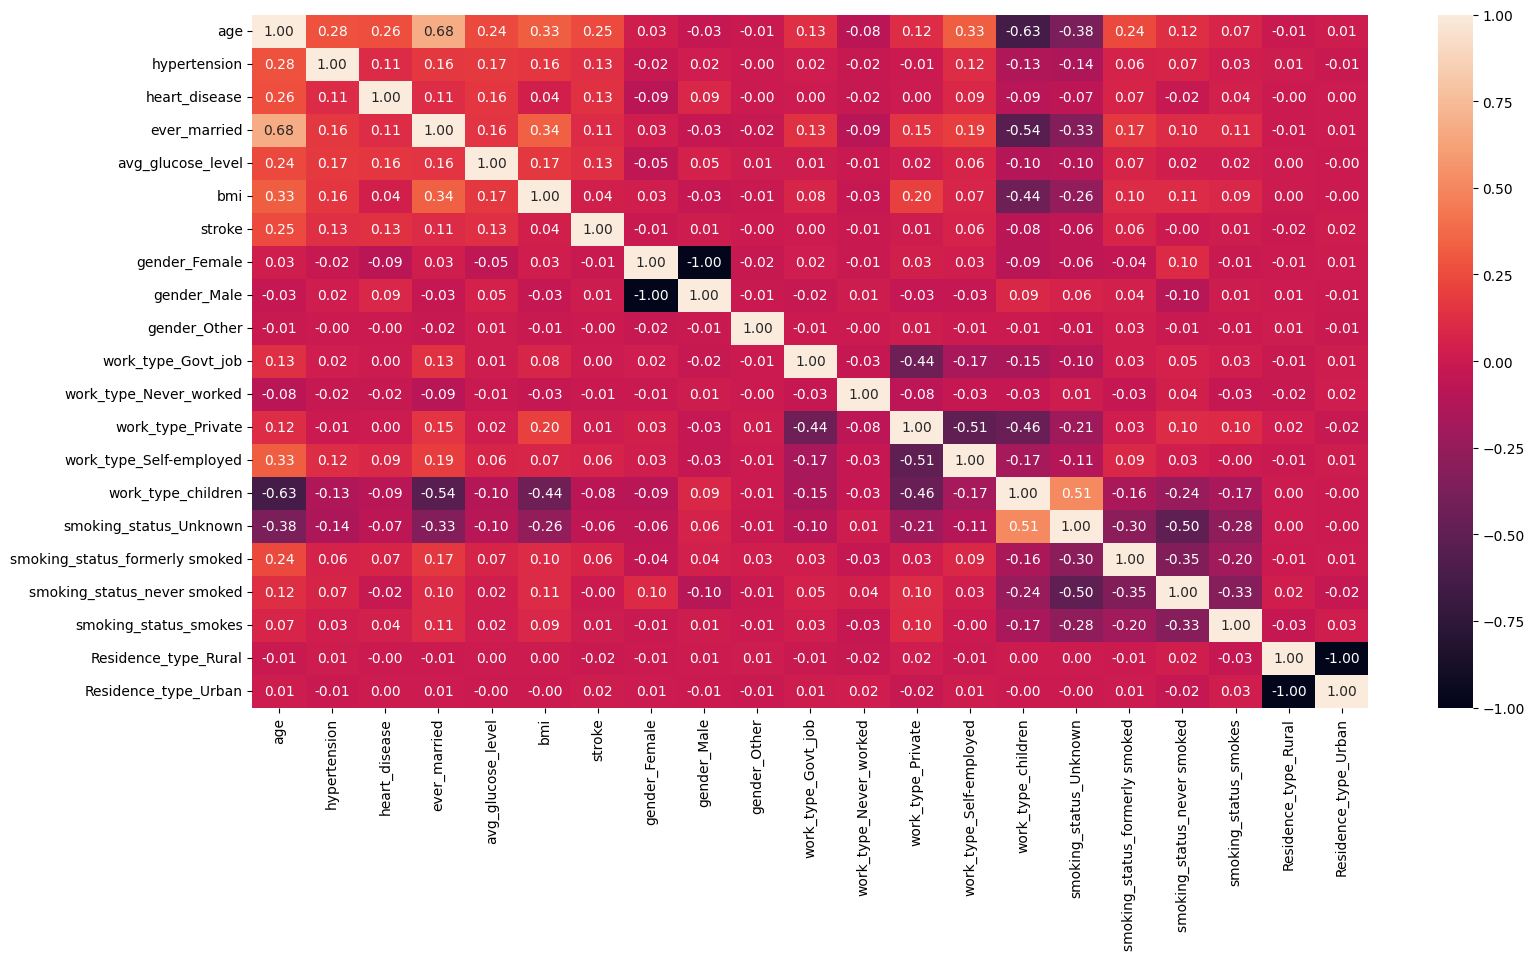

In [13]:
corr = df.corr()
plt.figure(figsize=(18,9))
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.show()

# **Modeling**

In [14]:
X = df.drop(columns = 'stroke')
y = df['stroke']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [16]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'n_estimators':[100,200,300,400,500],
    'max_depth':[None,2,3,4,5]
}

GSCV = GridSearchCV(clf, 
                    param_grid, 
                    cv=5,
                   scoring='accuracy')
GSCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [17]:
print('Best Params: ', GSCV.best_params_)
print('Best Score: ', GSCV.best_score_)

Best Params:  {'max_depth': 2, 'n_estimators': 100}
Best Score:  0.9542565830622498


Score:  0.9393346379647749


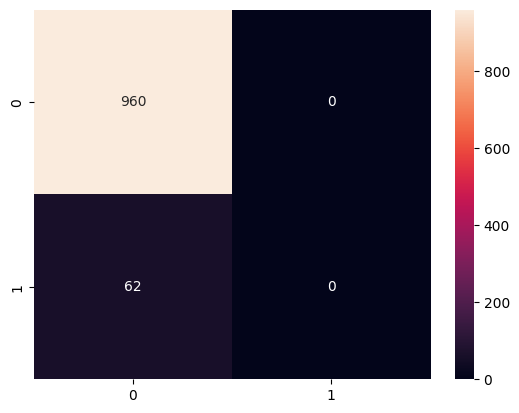

In [18]:
y_pred = GSCV.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Score: ', score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()